In [81]:
# importing libraries

import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Data/Real_combined_file.csv')

In [3]:
df.head()

,T,TM,Tm,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46,6.9,3.3,5.4,223.208333


In [4]:
df.shape

(1105, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1105 non-null   float64
 1   TM      1105 non-null   float64
 2   Tm      1105 non-null   float64
 3   H       1105 non-null   int64  
 4   VV      1105 non-null   float64
 5   V       1105 non-null   float64
 6   VM      1105 non-null   float64
 7   PM 2.5  1103 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 69.2 KB


In [6]:
df.isnull().sum()

T         0
TM        0
Tm        0
H         0
VV        0
V         0
VM        0
PM 2.5    2
dtype: int64

In [7]:
df.dtypes

T         float64
TM        float64
Tm        float64
H           int64
VV        float64
V         float64
VM        float64
PM 2.5    float64
dtype: object

<AxesSubplot:>

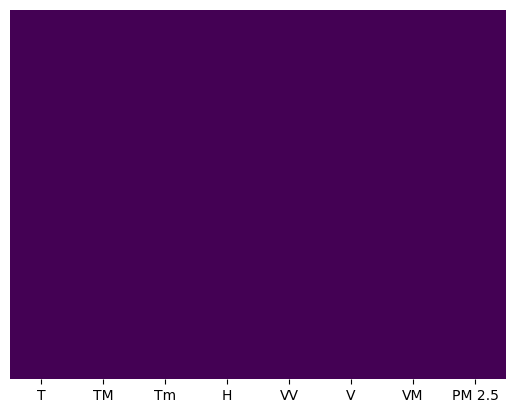

In [8]:
# Checking for null values:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
# Splitting the dataset:

X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [11]:
X

,T,TM,Tm,H,VV,V,VM
0,23.4,30.3,19.0,59,6.3,4.3,5.4
1,22.4,30.3,16.9,57,6.9,3.3,7.6
2,24.0,31.8,16.9,51,6.9,2.8,5.4
3,22.8,30.2,17.6,55,7.7,3.7,7.6
4,23.1,30.6,17.4,46,6.9,3.3,5.4
...,...,...,...,...,...,...,...
1098,22.2,27.7,17.7,63,6.9,2.8,7.6
1099,22.7,28.4,18.1,65,6.3,3.9,5.4
1100,23.4,29.1,18.4,62,6.0,5.7,9.4
1101,23.8,30.2,17.7,56,5.5,6.1,9.4


In [12]:
y

0       284.795833
1       219.720833
2       182.187500
3       154.037500
4       223.208333
           ...    
1098    188.041667
1099    310.250000
1100    204.375000
1101    223.250000
1102    248.958333
Name: PM 2.5, Length: 1103, dtype: float64

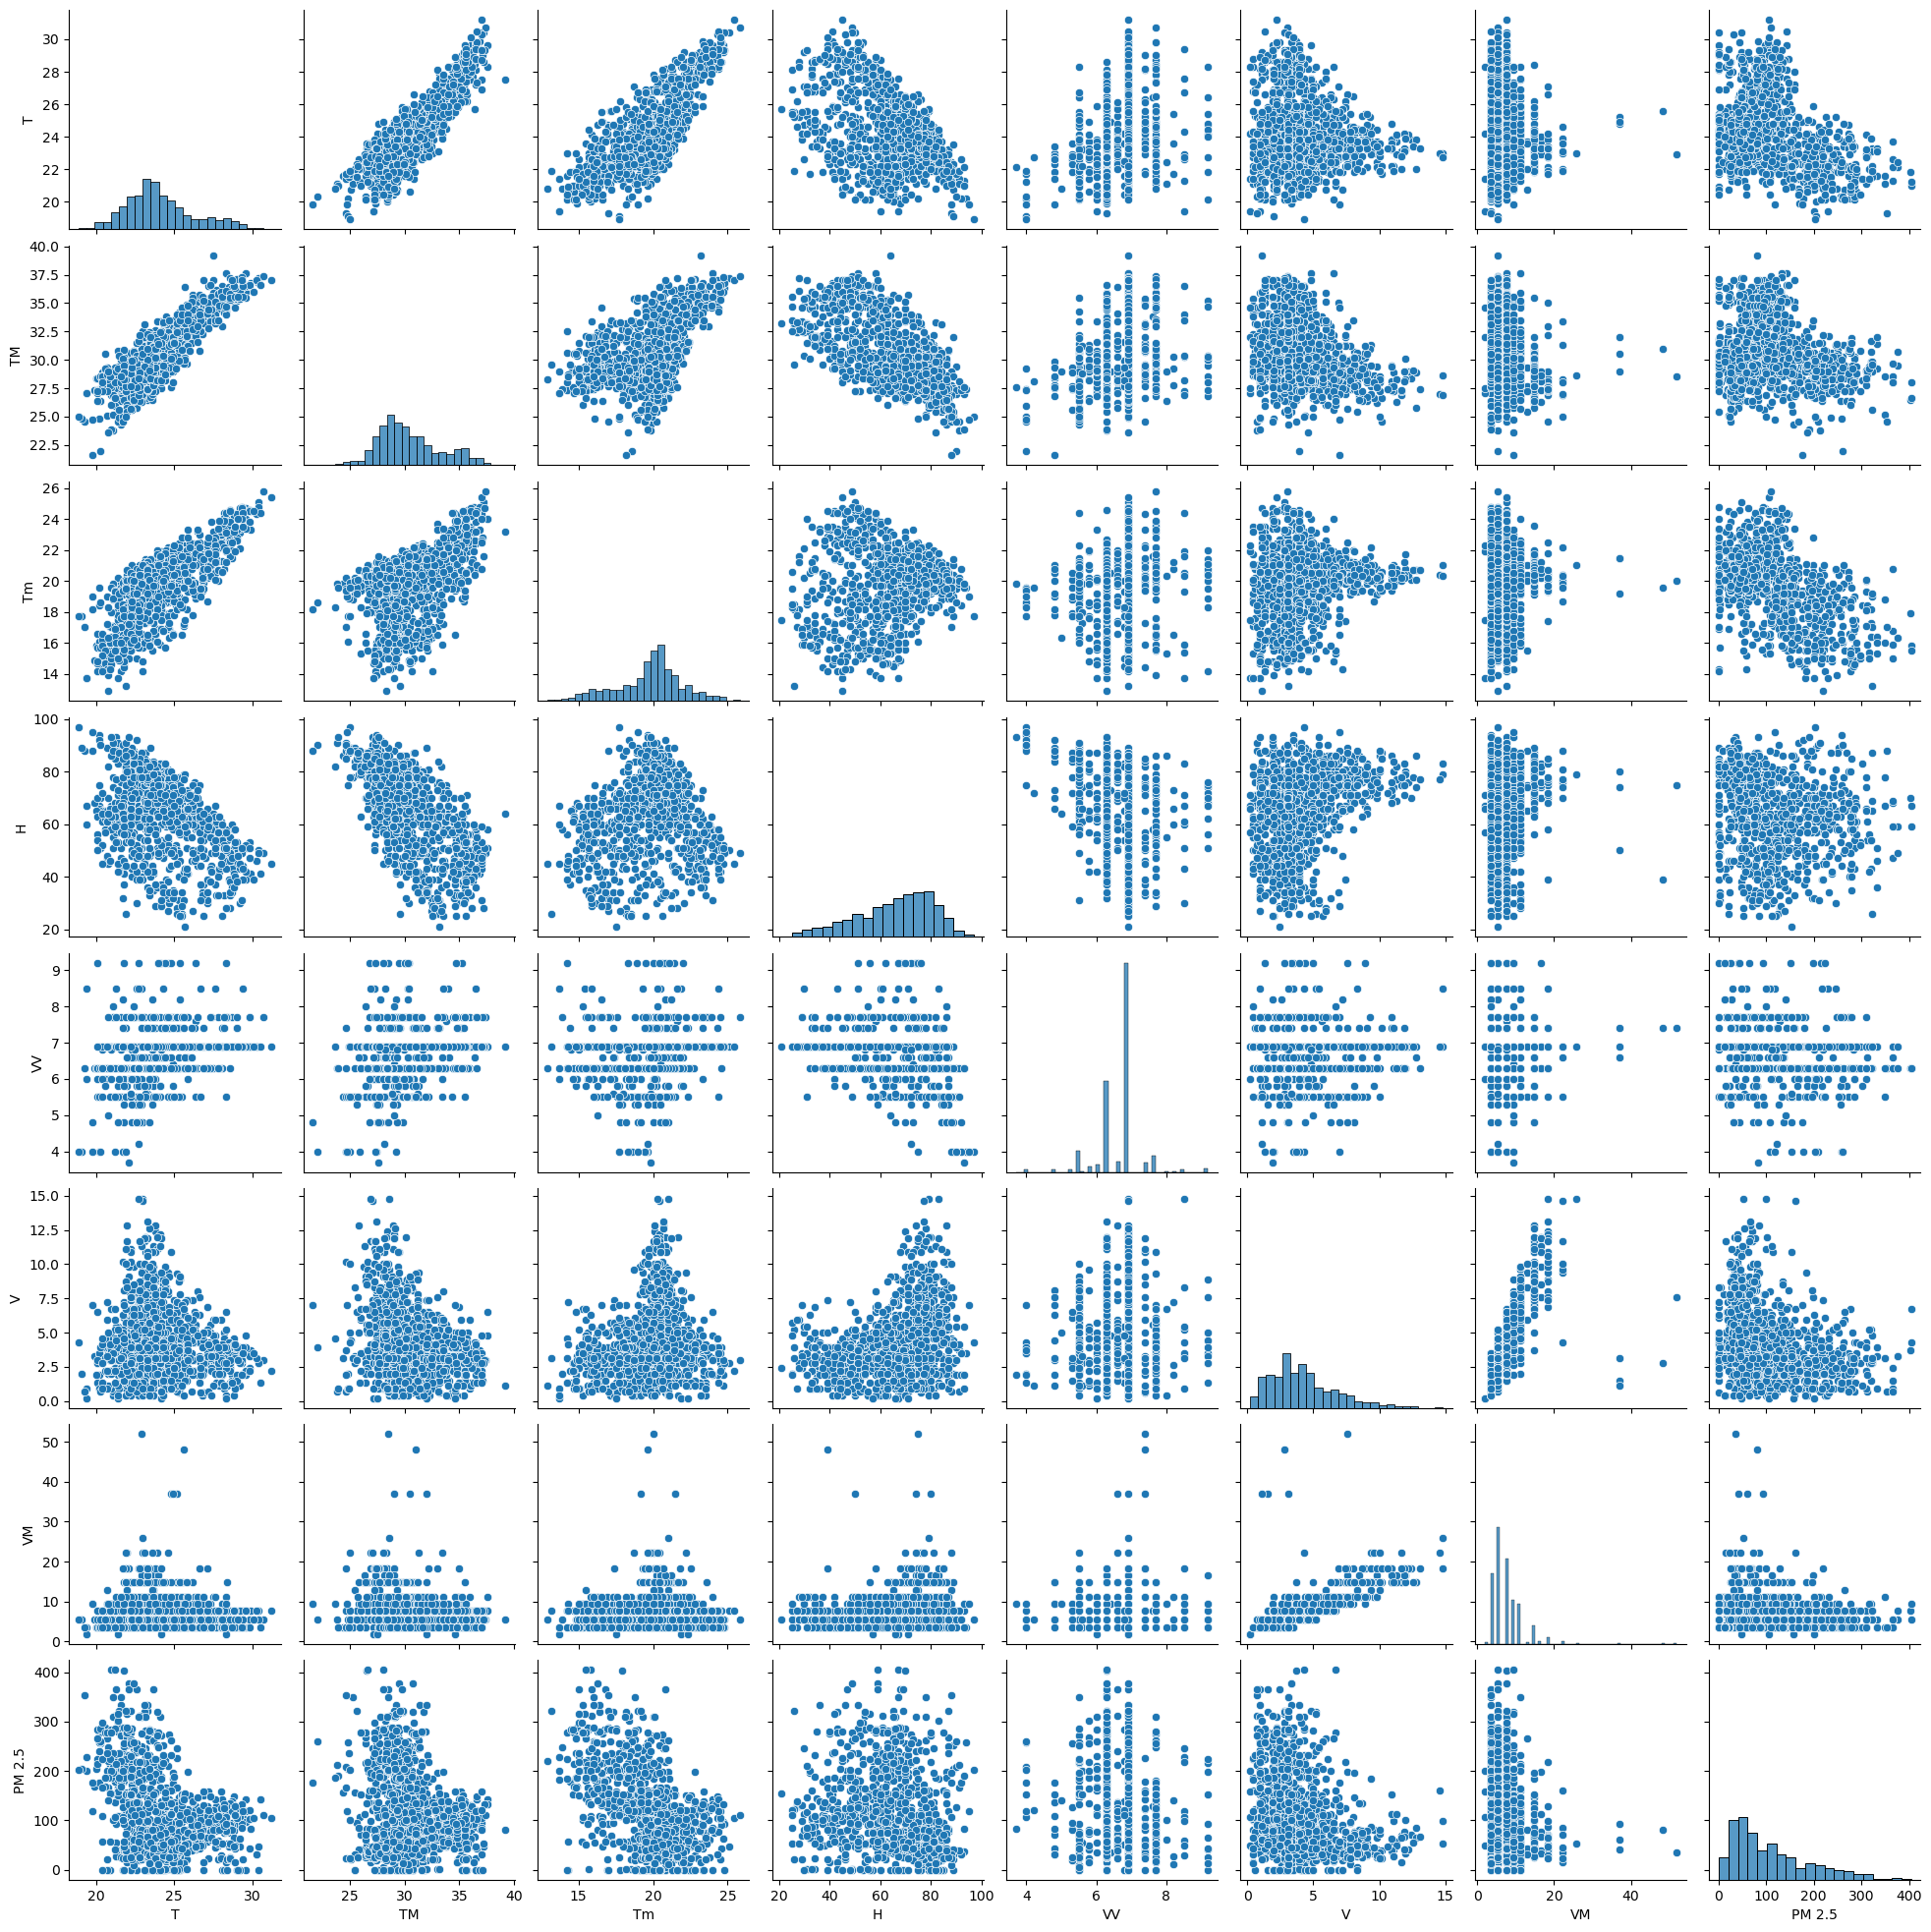

In [13]:
sns.pairplot(df)

In [14]:
df.corr()['PM 2.5']

T        -0.347038
TM       -0.162840
Tm       -0.514716
H        -0.218054
VV       -0.123441
V        -0.333317
VM       -0.268927
PM 2.5    1.000000
Name: PM 2.5, dtype: float64

In [16]:
df.corr()

,T,TM,Tm,H,VV,V,VM,PM 2.5
T,1.000000,0.869258,0.753944,-0.455387,0.325016,-0.112894,-0.066897,-0.347038
TM,0.869258,1.000000,0.478298,-0.636506,0.287989,-0.290409,-0.201408,-0.162840
Tm,0.753944,0.478298,1.000000,0.156138,0.138933,0.163599,0.141125,-0.514716
H,-0.455387,-0.636506,0.156138,1.000000,-0.274199,0.354845,0.262063,-0.218054
VV,0.325016,0.287989,0.138933,-0.274199,1.000000,0.051324,0.042967,-0.123441
V,-0.112894,-0.290409,0.163599,0.354845,0.051324,1.000000,0.710970,-0.333317
VM,-0.066897,-0.201408,0.141125,0.262063,0.042967,0.710970,1.000000,-0.268927
PM 2.5,-0.347038,-0.162840,-0.514716,-0.218054,-0.123441,-0.333317,-0.268927,1.000000


<AxesSubplot:>

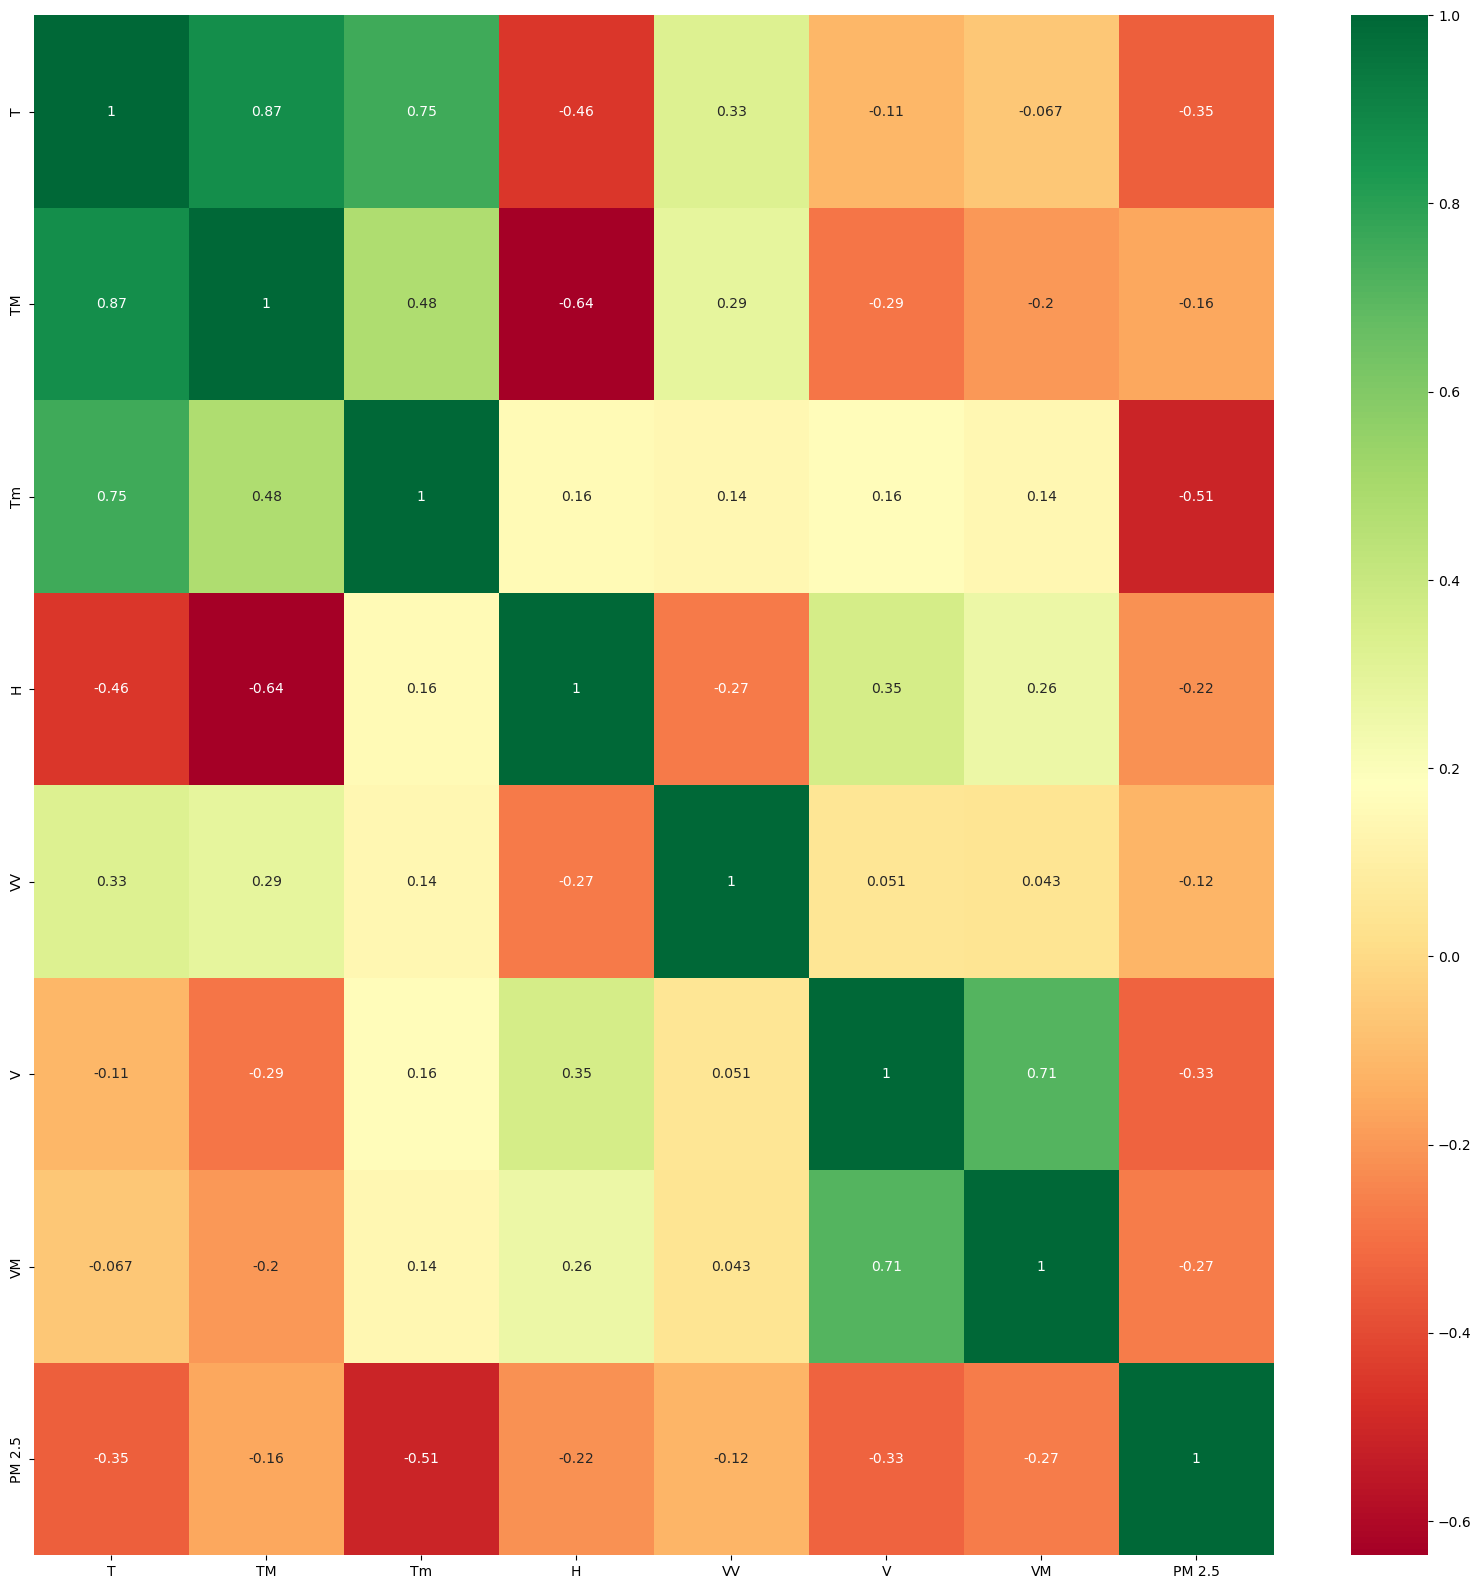

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [19]:
corrmat = df.corr()

corrmat.index

Index(['T', 'TM', 'Tm', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

## Feature Importance:

In [20]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [21]:
model.feature_importances_

array([0.19734415, 0.10784012, 0.29187357, 0.13008054, 0.06691426,
       0.13506743, 0.07087993])

In [22]:
model.feature_names_in_

array(['T', 'TM', 'Tm', 'H', 'VV', 'V', 'VM'], dtype=object)

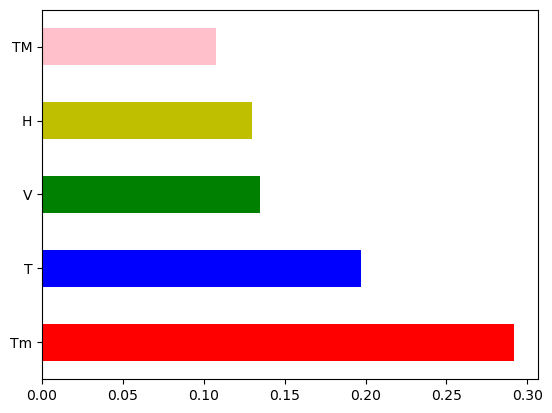

In [33]:
# plotting the features importance for better visualization:

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh',color=['r','b','g','y','pink'])
plt.show()

In [30]:
feat_importances.sort_values()

VV    0.066914
VM    0.070880
TM    0.107840
H     0.130081
V     0.135067
T     0.197344
Tm    0.291874
dtype: float64

## Linear Regression:

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

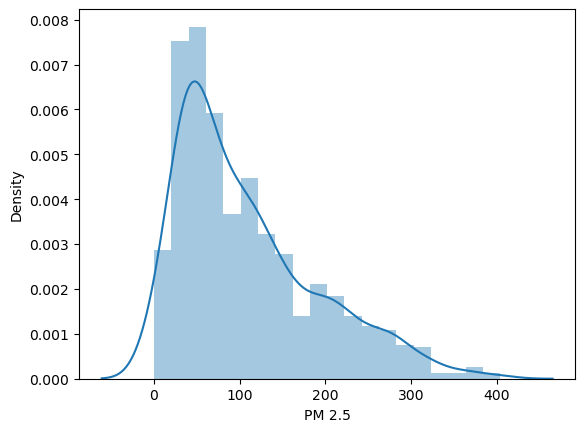

In [34]:
sns.distplot(y)

In [89]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [90]:
X_train.shape

(772, 7)

In [91]:
X_test.shape

(331, 7)

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [94]:
lr.coef_

array([-22.60425621,  -0.66044288,   2.42733022,  -2.2941454 ,
        -3.9075725 ,  -7.68163577,  -1.12525806])

In [95]:
pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])

,Coefficient
T,-22.604256
TM,-0.660443
Tm,2.427330
H,-2.294145
VV,-3.907573
V,-7.681636
VM,-1.125258


In [96]:
lr.intercept_

842.8892528727156

In [97]:
prediction = lr.predict(X_test)

In [98]:
print("Coefficient of determination R^2 <-- on train set: {}".format(lr.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.37658608368171353


In [99]:
print("Coefficient of determination R^2 <-- on test set: {}".format(lr.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.3203644983819267


In [100]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(lr, X, y, cv=5)

score.mean()

0.30779866414081736

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

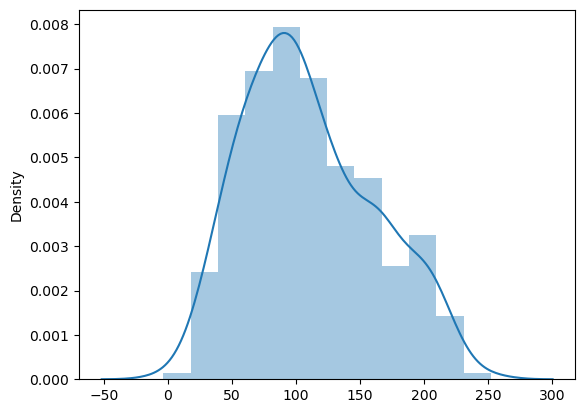

In [101]:
sns.distplot(prediction)

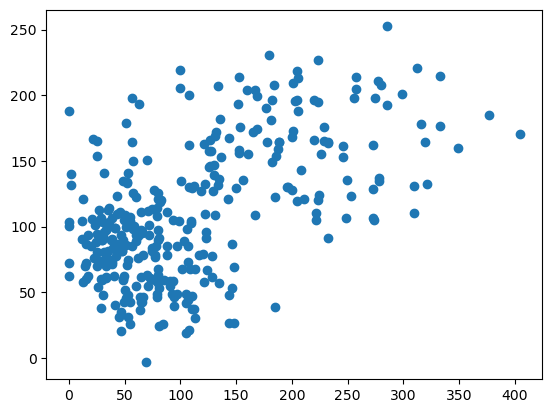

In [102]:
plt.scatter(y_test, prediction)

In [103]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [104]:
r2_score(y_test,prediction)

0.3203644983819267

In [105]:
mean_absolute_error(y_test, prediction)

53.50835013939555

In [106]:
mean_squared_error(y_test, prediction)

4636.584279901314

In [107]:
np.sqrt(mean_squared_error(y_test, prediction))

68.09246859896706

## Using only top 5 features:

In [50]:
model.feature_names_in_

array(['T', 'TM', 'Tm', 'H', 'VV', 'V', 'VM'], dtype=object)

In [63]:
pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)[:5]

Tm    0.291874
T     0.197344
V     0.135067
H     0.130081
TM    0.107840
dtype: float64

In [64]:
X_train_new= X_train[['T','Tm','TM','V','H']]

In [65]:
X_test_new = X_test[['T','Tm','TM','V','H']]

In [66]:
X_train_new.shape

(772, 5)

In [67]:
X_test_new.shape

(331, 5)

In [68]:
lr_new = LinearRegression()

lr_new.fit(X_train_new, y_train)

LinearRegression()

In [69]:
y_pred = lr_new.predict(X_test_new)

In [70]:
r2_score(y_test, y_pred)

0.2938741007348743

In [88]:
# Exporting the model:

import pickle

file = open('linreg_model.pkl','wb')
pickle.dump(lr, file)